### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from IPython.display import display

from sklearn.naive_bayes import GaussianNB

from pandas.api.types import is_string_dtype



### Candidatos do Enem

In [2]:
df_raw_enem_2018 = pd.read_csv("Projeto Educação/microdados_enem2018/DADOS/MICRODADOS_ENEM_2018.csv", 
                               low_memory=True, 
                               sep=';',  
                               encoding="latin_1")

In [3]:
df_raw_enem_2018.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.0,M,1.0,1,...,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,...,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,...,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.0,F,0.0,3,...,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,...,A,B,A,A,B,A,B,B,B,A


In [4]:
df_enem_2018 = df_raw_enem_2018[['SG_UF_RESIDENCIA',
                                 'NU_IDADE',
                                 'TP_SEXO',
                                 'TP_COR_RACA',
                                 'TP_NACIONALIDADE',
                                 'SG_UF_PROVA',
                                 'NU_NOTA_CN',
                                 'NU_NOTA_CH', 
                                 'NU_NOTA_LC',
                                 'NU_NOTA_MT',
                                 'Q027',
                                 'Q006']]
df_enem_2018

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q027,Q006
0,DF,44.0,M,1,0,GO,NaN,NaN,NaN,NaN,A,A
1,MA,23.0,F,3,1,MA,521.0,568.7,513.1,480.3,A,B
2,SP,23.0,F,1,1,RS,NaN,NaN,NaN,NaN,A,C
3,BA,26.0,F,3,2,BA,NaN,NaN,NaN,NaN,A,B
4,BA,20.0,M,0,1,BA,NaN,419.9,345.8,NaN,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...
5513742,RJ,56.0,F,1,1,RJ,NaN,NaN,NaN,NaN,C,D
5513743,AM,20.0,F,3,1,AM,435.6,556.8,460.8,528.1,A,B
5513744,SP,17.0,F,3,1,SP,NaN,NaN,NaN,NaN,A,C
5513745,SP,17.0,F,1,1,SP,524.9,496.5,512.5,474.1,C,D


In [5]:
df_enem_2018 = df_enem_2018.rename(columns={'Q027':'TipoEscola', 'Q006':'FaixaRenda'})
df_enem_2018

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TipoEscola,FaixaRenda
0,DF,44.0,M,1,0,GO,NaN,NaN,NaN,NaN,A,A
1,MA,23.0,F,3,1,MA,521.0,568.7,513.1,480.3,A,B
2,SP,23.0,F,1,1,RS,NaN,NaN,NaN,NaN,A,C
3,BA,26.0,F,3,2,BA,NaN,NaN,NaN,NaN,A,B
4,BA,20.0,M,0,1,BA,NaN,419.9,345.8,NaN,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...
5513742,RJ,56.0,F,1,1,RJ,NaN,NaN,NaN,NaN,C,D
5513743,AM,20.0,F,3,1,AM,435.6,556.8,460.8,528.1,A,B
5513744,SP,17.0,F,3,1,SP,NaN,NaN,NaN,NaN,A,C
5513745,SP,17.0,F,1,1,SP,524.9,496.5,512.5,474.1,C,D


In [6]:
candidatos_estado = df_enem_2018['SG_UF_RESIDENCIA'].value_counts()
candidatos_estado

SP    934174
MG    587471
BA    401328
RJ    382078
CE    329406
PE    304302
PA    283861
RS    243555
PR    236533
MA    218462
GO    191029
PB    152049
RN    124039
SC    123933
AM    123755
PI    118350
ES    112173
DF    104531
MT     96762
AL     89670
SE     74633
MS     72319
RO     62266
TO     55145
AP     40109
AC     37785
RR     14029
Name: SG_UF_RESIDENCIA, dtype: int64

In [7]:
candidatos_sexo = df_enem_2018['TP_SEXO'].value_counts()
candidatos_sexo

F    3257703
M    2256044
Name: TP_SEXO, dtype: int64

In [8]:
def display_all(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(df)

In [9]:
# from IPython.display import display

def show_more(df, lines):
    foo = 1
    display(df)
    foo = 2

In [10]:
display_all(df_enem_2018.groupby(['SG_UF_RESIDENCIA','TP_SEXO','TP_COR_RACA','NU_IDADE']).count())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
%matplotlib inline


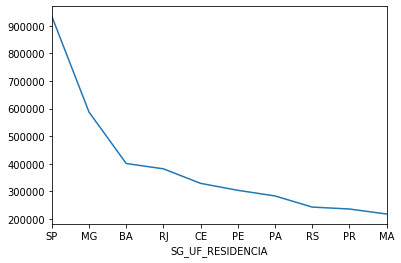

In [12]:
df_enem_2018.groupby(['SG_UF_RESIDENCIA'])['SG_UF_RESIDENCIA'].count().sort_values(ascending=False)[:10].plot()

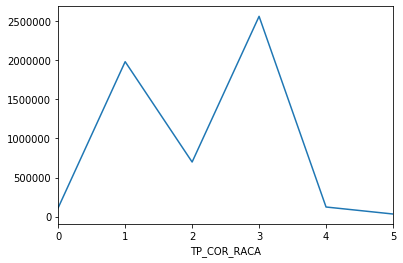

In [13]:
df_enem_2018.groupby(['TP_COR_RACA'])['TP_COR_RACA'].count().plot()

In [14]:
raça = {1:"Branca",
        2:"Preta",
        3:"Parda",
        4:"Amarela",
        5:"Indígena"}

In [15]:
nacionalida = { 0:"Não informado",
                1:"Brasileiro(a)",
                2:"Brasileiro(a) Naturalizado(a)",
                3:"Estrangeiro(a)",
                4:"Brasileiro(a) Nato(a), nascido(a) no exterior"}

In [16]:
TipoEscola = {  'A':"Somente em escola pública.", #0
                'B':"Parte em escola pública e parte em escola privada SEM bolsa de estudo integral.", #1
                'C':"Parte em escola pública e parte em escola privada COM bolsa de estudo integral.",#2
                'D':"Somente em escola privada SEM bolsa de estudo integral.",#3
                'E':"Somente em escola privada COM bolsa de estudo integral.", #4
                'F':"Não frequentei a escola"} #5

In [17]:
FaixaRenda = {  'A':"Nenhuma renda.",
                'B':"Até R$ 954,00.",
                'C':"De R$ 954,01 até R$ 1.431,00.",
                'D':"De R$ 1.431,01 até R$ 1.908,00.",
                'E':"De R$ 1.908,01 até R$ 2.385,00.",
                'F':"De R$ 2.385,01 até R$ 2.862,00.",
                'G':"De R$ 2.862,01 até R$ 3.816,00.",
                'H':"De R$ 3.816,01 até R$ 4.770,00.",
                'I':"De R$ 4.770,01 até R$ 5.724,00.",
                'J':"De R$ 5.724,01 até R$ 6.678,00.",
                'K':"De R$ 6.678,01 até R$ 7.632,00.",
                'L':"De R$ 7.632,01 até R$ 8.586,00.",
                'M':"De R$ 8.586,01 até R$ 9.540,00.",
                'N':"De R$ 9.540,01 até R$ 11.448,00.",
                'O':"De R$ 11.448,01 até R$ 14.310,00.",
                'P':"De R$ 14.310,01 até R$ 19.080,00.",
                'Q':"Mais de R$ 19.080,00."}

# """
# #CLASSES
# ## CLASSE E
# A	Nenhuma renda.
# B	Até R$ 954,00.
# C	De R$ 954,01 até R$ 1.431,00.

# ## CLASSE D
# D	De R$ 1.431,01 até R$ 1.908,00.
# E	De R$ 1.908,01 até R$ 2.385,00.
# F	De R$ 2.385,01 até R$ 2.862,00.

# ##CLASSE C
# G	De R$ 2.862,01 até R$ 3.816,00.
# H	De R$ 3.816,01 até R$ 4.770,00.
# I	De R$ 4.770,01 até R$ 5.724,00.
# J	De R$ 5.724,01 até R$ 6.678,00.


# ##CLASSE B
# K	De R$ 6.678,01 até R$ 7.632,00.
# L	De R$ 7.632,01 até R$ 8.586,00.
# M	De R$ 8.586,01 até R$ 9.540,00.
# N	De R$ 9.540,01 até R$ 11.448,00.


# ##CLASSE A
# O	De R$ 11.448,01 até R$ 14.310,00.
# P	De R$ 14.310,01 até R$ 19.080,00.
# Q	Mais de R$ 19.080,00.
# """

In [19]:
# df_enem_2018.groupby(['TP_COR_RACA'])['TP_COR_RACA'].count().plot()
# df_enem_2018.groupby(['TP_COR_RACA'])['TP_COR_RACA'].size().unstack().plot(kind='bar',stacked=True)
# plt.show()

In [20]:
# from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [21]:
X = df_enem_2018[['FaixaRenda', 'SG_UF_RESIDENCIA', 'TP_SEXO','TP_COR_RACA']]
X

,FaixaRenda,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA
0,A,DF,M,1
1,B,MA,F,3
2,C,SP,F,1
3,B,BA,F,3
4,B,BA,M,0
...,...,...,...,...
5513742,D,RJ,F,1
5513743,B,AM,F,3
5513744,C,SP,F,3
5513745,D,SP,F,1


In [22]:
# from pandas.api.types import is_string_dtype
    
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()


In [23]:
train_cats(X)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
X

,FaixaRenda,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA
0,A,DF,M,1
1,B,MA,F,3
2,C,SP,F,1
3,B,BA,F,3
4,B,BA,M,0
...,...,...,...,...
5513742,D,RJ,F,1
5513743,B,AM,F,3
5513744,C,SP,F,3
5513745,D,SP,F,1


In [25]:
X['FaixaRenda'] = X['FaixaRenda'].cat.rename_categories(range(X['FaixaRenda'].nunique()))

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
X['SG_UF_RESIDENCIA'].nunique()

27

In [27]:
X['SG_UF_RESIDENCIA'] = X['SG_UF_RESIDENCIA'].cat.rename_categories(range(X['SG_UF_RESIDENCIA'].nunique()))

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
X['TP_SEXO'] = X['TP_SEXO'].cat.rename_categories(range(X['TP_SEXO'].nunique()))

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
y = df_enem_2018[['TipoEscola']]
train_cats(y)
y['TipoEscola'] = y['TipoEscola'].cat.rename_categories(range(y['TipoEscola'].nunique()))
y.describe()

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TipoEscola
count,5513747
unique,6
top,0
freq,4208490


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
# print("Number of mislabeled points out of a total %d points : %d"
#       % (iris.data.shape[0],(iris.target != y_pred).sum()))

In [33]:
acerto = 1-(sum([y[0] != y_chapeu for y_chapeu, y in zip(y_pred, y_test.values)])/len(y_pred))

In [34]:
acerto

0.7937101581336351

In [35]:
pd.Series(y_pred).value_counts()

0    1619370
3     199830
1        337
dtype: int64

## Agora vamos tentar com RandomForest

In [37]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from fastai_utils import add_datepart, train_cats, proc_df
import os
import math

In [38]:
!pip install pyarrow

In [140]:
dic_acertos = {}

In [39]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

In [40]:
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [41]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

In [42]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        print(df)

In [ ]:
# df, y, nas = proc_df(df_raw, 'SalePrice')

# n_valid = 12000  # same as Kaggle's test set size
# n_trn = len(df)-n_valid
# raw_train, raw_valid = split_vals(df_raw, n_trn)
# X_train, X_valid = split_vals(df, n_trn)
# y_train, y_valid = split_vals(y, n_trn)

In [44]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)

In [46]:
X_train.shape

(3694210, 4)

In [47]:
y_train.shape

(3694210, 1)

In [48]:
X.shape

(5513747, 4)

In [49]:
y.shape

(5513747, 1)

In [50]:
m.fit(X_train, y_train)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [51]:
# print_score(m)
# y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred = m.predict(X_test)

In [52]:
acerto = 1-(sum([y[0] != y_chapeu for y_chapeu, y in zip(y_pred, y_test.values)])/len(y_pred))

In [53]:
acerto

0.8021073492872088

In [54]:
pd.Series(y_pred).value_counts()

0    1647456
3     171744
1        336
4          1
dtype: int64

In [65]:
y_test['TipoEscola'].value_counts()

0    1388780
3     204263
1     141300
2      46345
4      37943
5        906
Name: TipoEscola, dtype: int64

In [66]:
len(y_test)

1819537

In [68]:
m = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
acerto = 1-(sum([y[0] != y_chapeu for y_chapeu, y in zip(y_pred, y_test.values)])/len(y_pred))
acerto

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8021084484679344

In [69]:
y_test['TipoEscola'].value_counts()

0    1388780
3     204263
1     141300
2      46345
4      37943
5        906
Name: TipoEscola, dtype: int64

In [72]:
pd.Series(y_pred).value_counts()

0    1647395
3     171964
1        178
dtype: int64

### Feature Engineering

In [83]:
# X = df_enem_2018[['FaixaRenda', 'SG_UF_RESIDENCIA', 'TP_SEXO','TP_COR_RACA']]
X = df_enem_2018.drop('TipoEscola', axis=1)

In [93]:
train_cats(X)

In [104]:
for feature in X.columns:
#     print(feature)
#     print(type(X[feature].dtype))
    if (type(X[feature].dtype) == type(X["SG_UF_RESIDENCIA"].dtype)):
#         print(f"Entrei: {type(X[feature].dtype)} == {type(X['SG_UF_RESIDENCIA'].dtype)} == {type(X[feature].dtype) == type(X['SG_UF_RESIDENCIA'].dtype)}")
        X[feature] = X[feature].cat.rename_categories(range(X[feature].nunique()))

In [105]:
X

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,FaixaRenda
0,6,44.0,1,1,0,8,NaN,NaN,NaN,NaN,0
1,9,23.0,0,3,1,9,521.0,568.7,513.1,480.3,1
2,25,23.0,0,1,1,22,NaN,NaN,NaN,NaN,2
3,4,26.0,0,3,2,4,NaN,NaN,NaN,NaN,1
4,4,20.0,1,0,1,4,NaN,419.9,345.8,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
5513742,18,56.0,0,1,1,18,NaN,NaN,NaN,NaN,3
5513743,2,20.0,0,3,1,2,435.6,556.8,460.8,528.1,1
5513744,25,17.0,0,3,1,25,NaN,NaN,NaN,NaN,2
5513745,25,17.0,0,1,1,25,524.9,496.5,512.5,474.1,3


In [106]:
m = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)

In [107]:
m.fit(X_train, y_train)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [108]:
y_pred = m.predict(X_test)

In [109]:
acerto = 1-(sum([y[0] != y_chapeu for y_chapeu, y in zip(y_pred, y_test.values)])/len(y_pred))

In [110]:
acerto

0.8021298824920845

In [ ]:
X = df_enem_2018.drop('TipoEscola', axis=1)
def prepara(X):
    train_cats(X)
    for feature in X.columns:
        if (type(X[feature].dtype) == type(X["SG_UF_RESIDENCIA"].dtype)):
            X[feature] = X[feature].cat.rename_categories(range(X[feature].nunique()))

## Refazendo tudo

In [111]:
from fastai_utils import add_datepart, train_cats, proc_df

In [112]:
X, y, _ = proc_df(df_enem_2018, 'TipoEscola')

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=55)

In [117]:
m = RandomForestClassifier(n_estimators=50, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)

In [118]:
%time m.fit(X_train, y_train)

Wall time: 12min 18s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [119]:
y_pred = m.predict(X_test)

In [121]:
def testa_acertos():
    acerto = 1-(sum([y != y_chapeu for y_chapeu, y in zip(y_pred, y_test)])/len(y_pred))
    dic_acertos[tentativa] = [acerto, X.columns]
    tentativa += 1

In [122]:
acerto

0.8100093595238789

In [131]:
df_cropado = df_enem_2018[['FaixaRenda', 'SG_UF_RESIDENCIA', 'TP_SEXO','TP_COR_RACA','TipoEscola']]

In [132]:
df_cropado

,FaixaRenda,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,TipoEscola
0,A,DF,M,1,A
1,B,MA,F,3,A
2,C,SP,F,1,A
3,B,BA,F,3,A
4,B,BA,M,0,A
...,...,...,...,...,...
5513742,D,RJ,F,1,C
5513743,B,AM,F,3,A
5513744,C,SP,F,3,A
5513745,D,SP,F,1,C


In [133]:
X, y, _ = proc_df(df_cropado, 'TipoEscola')

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=55)

In [135]:
m = RandomForestClassifier(n_estimators=25, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)

In [136]:
%time m.fit(X_train, y_train)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Wall time: 1min 16s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [137]:
y_pred = m.predict(X_test)

In [138]:
acerto = 1-(sum([y != y_chapeu for y_chapeu, y in zip(y_pred, y_test)])/len(y_pred))

In [139]:
acerto

0.8019094967565925

In [126]:
df_cropado = df_enem_2018[['FaixaRenda', 'SG_UF_RESIDENCIA', 'TP_SEXO','TP_COR_RACA','TipoEscola']]

In [127]:
X, y, _ = proc_df(df_cropado, 'TipoEscola')

KeyError: 'TipoEscola'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=55)

In [ ]:
m = RandomForestClassifier(n_estimators=50, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)

In [ ]:
%time m.fit(X_train, y_train)

In [ ]:
y_pred = m.predict(X_test)

In [ ]:
acerto = 1-(sum([y != y_chapeu for y_chapeu, y in zip(y_pred, y_test)])/len(y_pred))

In [123]:
acerto

0.8100093595238789